## Importing libraries

In [1106]:
import pandas as pd
pd.set_option("display.max_columns", 300)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests
import json
import datetime

In [12]:
url_website = 'https://public.opendatasoft.com/explore/dataset/ntsb-aviation-accident-dataset/table/?refine.investigation_type=Accident&refine.country=United+States'

## API calls

In [80]:
for year in range(2019, 1981, -1):
    url_yearly = f'https://public.opendatasoft.com/api/records/1.0/search/?dataset=ntsb-aviation-accident-dataset&rows=4000&refine.investigation_type=Accident&refine.country=United+States&refine.event_date={year}'
    response = requests.get(url_yearly)
    # Print the status code of the response.
    print(response.status_code, year)
    data_current_year = response.json()
    df = pd.DataFrame([data_current_year['records'][x]['fields'] for x in range(len(data_current_year['records']))])
    csv_name = f'{year}.csv'
    df.to_csv(csv_name, index = False)

200 2019
200 2018
200 2017
200 2016
200 2015
200 2014
200 2013
200 2012
200 2011
200 2010
200 2009
200 2008
200 2007
200 2006
200 2005
200 2004
200 2003
200 2002
200 2001
200 2000
200 1999
200 1998
200 1997
200 1996
200 1995
200 1994
200 1993
200 1992
200 1991
200 1990
200 1989
200 1988
200 1987
200 1986
200 1985
200 1984
200 1983


In [101]:
data_total = pd.read_csv('2019.csv')
for year in range(2018, 1981, -1):
    csv_name = f'{year}.csv'
    df_current = pd.read_csv(csv_name)
    data_total = pd.concat([data_total, df_current], sort=False)
data_total

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
0,GAA19CA405,Air Methods Corporation,Helicopter,NaN,NaN,NaN,No,NaN,United States,NaN,2019-06-17,20190711X50821,Part 135: Air Taxi & Commuter,"[42.686944, -74.482778]",Non-Fatal,Accident,42.686944,"Cobleskill, NY",-74.482778,Eurocopter,EC135,2.0,07/12/2019,NaN,N135WJ,Preliminary,NSCH,NaN,NaN,NaN,3.0,VMC
1,GAA19CA321,NaN,Airplane,NaN,NaN,NaN,No,NaN,United States,NaN,2019-06-08,20190608X62310,Part 91: General Aviation,"[47.139722, -119.339166]",Unavailable,Accident,47.139722,"Moses Lake, WA",-119.339166,Cessna,180,1.0,06/10/2019,Personal,N7529K,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN
2,CEN19LA317,NaN,Airplane,Destroyed,BCT,Boca Raton Airport,No,TAKEOFF,United States,NaN,2019-09-11,20190911X11037,Part 91: General Aviation,"[26.378611, -80.108333]",Non-Fatal,Accident,26.378611,"Boca Raton, FL",-80.108333,Piper,PA28,NaN,09/13/2019,Personal,N2890T,Preliminary,NaN,NaN,1.0,1.0,NaN,VMC
3,GAA19CA522,NaN,Airplane,Substantial,4W0,Bandera State,No,NaN,United States,NaN,2019-09-01,20190902X51258,Part 91: General Aviation,"[47.395277, -121.536389]",Non-Fatal,Accident,47.395277,"Bandera, WA",-121.536389,Stinson,108,1.0,09/18/2019,Personal,N97699,Preliminary,NaN,NaN,NaN,NaN,1.0,NaN
4,WPR19LA249,NaN,Helicopter,Substantial,NaN,NaN,No,TAKEOFF,United States,NaN,2019-08-31,20190902X20500,Part 91: General Aviation,"[46.251667, -116.968611]",Non-Fatal,Accident,46.251667,"Asotin, WA",-116.968611,Hughes,369,1.0,09/24/2019,Personal,N54528,Preliminary,NaN,NaN,NaN,NaN,2.0,NaN
5,GAA19CA537,NaN,Airplane,NaN,F70,French Valley,Yes,NaN,United States,NaN,2019-08-30,20190830X73654,Part 91: General Aviation,"[33.574167, -117.128611]",Unavailable,Accident,33.574167,"Murrieta, CA",-117.128611,Czech Sport,SPORTCRUISER,NaN,09/18/2019,Instructional,N117BF,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN
6,ERA19LA255,NaN,Airplane,Substantial,TPA,Tampa International Airport,No,LANDING,United States,Reciprocating,2019-08-21,20190822X70303,Part 91: General Aviation,"[27.978889, -82.528334]",Non-Fatal,Accident,27.978889,"Tampa, FL",-82.528334,Cessna,310,2.0,09/19/2019,Personal,N2299F,Preliminary,NaN,NaN,NaN,NaN,1.0,VMC
7,ERA19FA251,NaN,Airplane,Substantial,XSA,Tappahannock-Essex County Airp,No,CRUISE,United States,Reciprocating,2019-08-19,20190819X74817,Part 91: General Aviation,"[37.86, -76.884722]",Non-Fatal,Accident,37.860000,"Tappahannock, VA",-76.884722,Cirrus,SR22,1.0,09/04/2019,Personal,N621JE,Preliminary,NaN,NaN,NaN,1.0,NaN,VMC
8,ERA19FA249,NaN,Airplane,Destroyed,44N,Sky Acres,No,TAKEOFF,United States,Reciprocating,2019-08-17,20190818X75840,Part 91: General Aviation,"[41.7, -73.729167]",Fatal(2),Accident,41.700000,"Lagrangeville, NY",-73.729167,Cessna,T303,2.0,09/04/2019,Business,N303TL,Preliminary,NaN,2.0,1.0,3.0,NaN,VMC
9,GAA19CA480,NaN,Airplane,Substantial,NaN,NaN,No,NaN,United States,NaN,2019-08-04,20190804X90303,Part 137: Agricultural,"[40.937777, -97.502222]",Non-Fatal,Accident,40.937777,"Waco, NE",-97.502222,Air Tractor,AT502,1.0,08/12/2019,Aerial Application,N730JD,Preliminary,NaN,NaN,NaN,NaN,1.0,VMC


In [102]:
data_total.to_csv('1982-2019.csv', index = False)

In [103]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76477 entries, 0 to 3444
Data columns (total 32 columns):
accident_number           76477 non-null object
air_carrier               2998 non-null object
aircraft_category         23947 non-null object
aircraft_damage           75452 non-null object
airport_code              45191 non-null object
airport_name              47751 non-null object
amateur_built             76412 non-null object
broad_phase_of_flight     73372 non-null object
country                   76477 non-null object
engine_type               75091 non-null object
event_date                76477 non-null object
event_id                  76477 non-null object
far_description           24056 non-null object
geo_point                 27736 non-null object
injury_severity           76477 non-null object
investigation_type        76477 non-null object
latitude                  27752 non-null float64
location                  76452 non-null object
longitude                 27

## Data Exploration

In [105]:
data_total = pd.read_csv('1982-2019.csv')

In [108]:
data_total.tail()

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
76472,SEA82DA027,NaN,Airplane,Substantial,S40,GEORGE O. BEARDSLEY FIELD,No,LANDING,United States,Reciprocating,1982-02-07,20020917X02584,Part 91: General Aviation,NaN,Non-Fatal,Accident,NaN,"PROSSER, WA",NaN,PIPER,PA-28-180,1.0,02/07/1983,Instructional,N8280W,Probable Cause,NaN,0.0,0.0,0.0,1.0,VMC
76473,NYC82DA033,NaN,Airplane,Substantial,NaN,MARTHAS VINEYARD,No,LANDING,United States,Reciprocating,1982-02-07,20020917X02495,Part 91: General Aviation,NaN,Non-Fatal,Accident,NaN,"MARTHAS VINEYARD, MA",NaN,BELLANCA,7KCAB,1.0,05/05/2011,Personal,N41694,Probable Cause,NaN,NaN,NaN,NaN,2.0,VMC
76474,LAX82FJA04,NaN,Airplane,Destroyed,NaN,KALAUPAPA,Yes,LANDING,United States,Reciprocating,1982-02-07,20020917X02284,Part 91: General Aviation,NaN,Non-Fatal,Accident,NaN,"KALAUPAPA, HI",NaN,PIPER,PA-28-140,1.0,02/07/1983,Personal,N16524,Probable Cause,NaN,0.0,0.0,4.0,0.0,VMC
76475,CHI82DA035,NaN,Airplane,Substantial,8Y2,BUFFALO,No,LANDING,United States,Reciprocating,1982-02-06,20020917X01786,Part 91: General Aviation,NaN,Non-Fatal,Accident,NaN,"BUFFALO, MN",NaN,CESSNA,150,1.0,02/06/1983,Instructional,N10794,Probable Cause,NaN,0.0,2.0,0.0,0.0,VMC
76476,CHI82DA021,NaN,Airplane,Substantial,1C1,PAXTON MUNICIPAL,No,APPROACH,United States,Reciprocating,1982-01-06,20020917X01777,Part 91: General Aviation,NaN,Non-Fatal,Accident,NaN,"PAXTON, IL",NaN,CESSNA,152,1.0,01/06/1983,Instructional,N4900L,Probable Cause,NaN,0.0,0.0,0.0,2.0,VMC


In [107]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76477 entries, 0 to 76476
Data columns (total 32 columns):
accident_number           76477 non-null object
air_carrier               2998 non-null object
aircraft_category         23947 non-null object
aircraft_damage           75452 non-null object
airport_code              45191 non-null object
airport_name              47751 non-null object
amateur_built             76412 non-null object
broad_phase_of_flight     73372 non-null object
country                   76477 non-null object
engine_type               75091 non-null object
event_date                76477 non-null object
event_id                  76477 non-null object
far_description           24056 non-null object
geo_point                 27736 non-null object
injury_severity           76477 non-null object
investigation_type        76477 non-null object
latitude                  27752 non-null float64
location                  76452 non-null object
longitude                 2

In [109]:
data_total.nunique()

accident_number           76199
air_carrier                2402
aircraft_category            13
aircraft_damage               3
airport_code               9334
airport_name              22517
amateur_built                 2
broad_phase_of_flight        12
country                       1
engine_type                  13
event_date                13469
event_id                  75203
far_description              16
geo_point                 22766
injury_severity              53
investigation_type            1
latitude                  18454
location                  22691
longitude                 19961
make                       7773
model                     10740
number_of_engines             5
publication_date           2541
purpose_of_flight            22
registration_number       68977
report_status                 4
schedule                      3
total_fatal_injuries         52
total_minor_injuries         47
total_serious_injuries       24
total_uninjured             274
weather_

In [126]:
data_total.event_date = data_total.event_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76477 entries, 0 to 76476
Data columns (total 32 columns):
accident_number           76477 non-null object
air_carrier               2998 non-null object
aircraft_category         23947 non-null object
aircraft_damage           75452 non-null object
airport_code              45191 non-null object
airport_name              47751 non-null object
amateur_built             76412 non-null object
broad_phase_of_flight     73372 non-null object
country                   76477 non-null object
engine_type               75091 non-null object
event_date                76477 non-null datetime64[ns]
event_id                  76477 non-null object
far_description           24056 non-null object
geo_point                 27736 non-null object
injury_severity           76477 non-null object
investigation_type        76477 non-null object
latitude                  27752 non-null float64
location                  76452 non-null object
longitude          

In [127]:
data_total.nunique()

accident_number           76199
air_carrier                2402
aircraft_category            13
aircraft_damage               3
airport_code               9334
airport_name              22517
amateur_built                 2
broad_phase_of_flight        12
country                       1
engine_type                  13
event_date                13469
event_id                  75203
far_description              16
geo_point                 22766
injury_severity              53
investigation_type            1
latitude                  18454
location                  22691
longitude                 19961
make                       7773
model                     10740
number_of_engines             5
publication_date           2541
purpose_of_flight            22
registration_number       68977
report_status                 4
schedule                      3
total_fatal_injuries         52
total_minor_injuries         47
total_serious_injuries       24
total_uninjured             274
weather_

In [1194]:
#Verification of null values

In [238]:
data_total.groupby(data_total.event_date.dt.year).count()

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
event_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1982,3445,168,3419,3415,1607,2093,3444,3443,3445,3445,3445,3445,3419,1,3445,3445,1,3445,1,3438,3431,3445,3445,3443,3445,3445,467,3425,3423,3422,3437,3444
1983,3391,78,7,3351,1894,2115,3391,3388,3391,3390,3391,3391,7,2,3391,3391,2,3390,2,3391,3391,3333,17,3389,3391,3391,564,3385,3375,3379,3382,3391
1984,3290,96,7,3251,1518,1840,3290,3289,3290,3290,3290,3290,7,0,3290,3290,0,3289,0,3290,3289,3243,17,3289,3290,3290,513,3279,3278,3278,3282,3290
1985,2972,113,7,2949,1504,1774,2972,2970,2972,2972,2972,2972,7,0,2972,2972,0,2971,0,2972,2972,2939,14,2966,2972,2972,382,2964,2959,2963,2958,2972
1986,2758,94,7,2729,1501,1656,2758,2756,2758,2758,2758,2758,7,0,2758,2758,0,2758,0,2758,2757,2704,457,2758,2758,2758,365,2754,2747,2750,2749,2757
1987,2665,107,4,2639,1440,1606,2665,2660,2665,2664,2665,2665,4,0,2665,2665,0,2665,0,2665,2665,2630,2663,2660,2665,2665,355,2656,2655,2653,2656,2665
1988,2537,103,9,2513,1368,1488,2537,2531,2537,2537,2537,2537,9,1,2537,2537,1,2537,1,2537,2537,2506,2536,2536,2537,2537,325,2526,2523,2525,2530,2537
1989,2410,103,8,2388,1396,1392,2410,2397,2410,2410,2410,2410,8,1,2410,2410,1,2409,1,2410,2409,2388,2410,2406,2410,2410,339,2404,2401,2396,2400,2410
1990,2404,109,19,2377,1457,1361,2404,2375,2404,2404,2404,2404,19,1,2404,2404,1,2404,1,2403,2404,2367,2404,2402,2404,2404,354,2395,2387,2385,2395,2404


#### Divide dataset to train and test subsets based on date

In [246]:
test_validation_df = data_total[data_total.event_date >= '2017-01-01']
train_df = data_total[(data_total.event_date < '2017-01-01') & (data_total.event_date > '2008-01-01')]
test_validation_df.shape, train_df.shape

((3886, 32), (13111, 32))

In [247]:
train_df.head()

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
3886,ERA17LA075,NaN,Airplane,Substantial,NaN,NaN,No,MANEUVERING,United States,Reciprocating,2016-12-27,20161227X00453,Part 91: General Aviation,"[34.985833, -85.722778]",Non-Fatal,Accident,34.985833,"Bridgeport, AL",-85.722778,CESSNA,172,1.0,05/24/2019,Personal,N3772F,Factual,NaN,NaN,1.0,1.0,NaN,VMC
3887,CEN17LA090,NaN,Airplane,Substantial,91C,Sauk-Prairie Airport,No,TAXI,United States,Reciprocating,2016-12-28,20170130X43816,Part 91: General Aviation,"[43.297777, -89.755833]",Non-Fatal,Accident,43.297777,"Prairie Du Sac, WI",-89.755833,CESSNA,172B,1.0,11/26/2018,Personal,N6941X,Probable Cause,NaN,NaN,NaN,NaN,2.0,VMC
3888,GAA17CA109,NaN,Airplane,Substantial,EZI,KEWANEE MUNI,No,APPROACH,United States,Reciprocating,2016-12-16,20170110X44641,Part 91: General Aviation,"[41.204167, -89.970278]",Non-Fatal,Accident,41.204167,"Kewanee, IL",-89.970278,PIPER,PA28R,1.0,03/13/2017,Personal,N55484,Probable Cause,NaN,NaN,NaN,NaN,2.0,IMC
3889,CEN17LA057,NaN,Airplane,Substantial,Y70,Ionia County Airport,No,TAKEOFF,United States,Reciprocating,2016-12-16,20161219X04338,Part 91: General Aviation,"[42.938055, -85.060556]",Non-Fatal,Accident,42.938055,"Ionia, MI",-85.060556,STINSON,108-3,1.0,03/06/2017,Personal,N812C,Probable Cause,NaN,NaN,NaN,NaN,1.0,VMC
3890,ANC17LA014,BIDZY TA HOT AANA CORP (DBA: Tanana Air Service),Airplane,Minor,MCG,MC GRATH,No,DESCENT,United States,Reciprocating,2016-11-20,20161221X32443,Part 135: Air Taxi & Commuter,"[62.952778, -155.605556]",Non-Fatal,Accident,62.952778,"McGrath, AK",-155.605556,PIPER,PA 32R-300,1.0,09/10/2018,NaN,N4352F,Probable Cause,NSCH,NaN,NaN,1.0,3.0,VMC


In [248]:
test_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3885
Data columns (total 32 columns):
accident_number           3886 non-null object
air_carrier               184 non-null object
aircraft_category         3852 non-null object
aircraft_damage           3804 non-null object
airport_code              2703 non-null object
airport_name              2659 non-null object
amateur_built             3873 non-null object
broad_phase_of_flight     3125 non-null object
country                   3886 non-null object
engine_type               3305 non-null object
event_date                3886 non-null datetime64[ns]
event_id                  3886 non-null object
far_description           3886 non-null object
geo_point                 3706 non-null object
injury_severity           3886 non-null object
investigation_type        3886 non-null object
latitude                  3706 non-null float64
location                  3883 non-null object
longitude                 3706 non-null

In [249]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 32 columns):
accident_number           13111 non-null object
air_carrier               646 non-null object
aircraft_category         12929 non-null object
aircraft_damage           12902 non-null object
airport_code              9145 non-null object
airport_name              9356 non-null object
amateur_built             13074 non-null object
broad_phase_of_flight     10955 non-null object
country                   13111 non-null object
engine_type               12669 non-null object
event_date                13111 non-null datetime64[ns]
event_id                  13111 non-null object
far_description           13000 non-null object
geo_point                 12859 non-null object
injury_severity           13111 non-null object
investigation_type        13111 non-null object
latitude                  12860 non-null float64
location                  13100 non-null object
longitude          

In [250]:
train_df['fatality'] = train_df.injury_severity.apply(lambda x: 0 if x == 'Non-Fatal' else 1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### EDA

In [204]:
data_total.injury_severity.value_counts()

Non-Fatal      61900
Fatal(1)        7547
Fatal(2)        4271
Fatal(3)        1254
Fatal(4)         836
Fatal(5)         223
Unavailable      138
Fatal(6)         132
Fatal(7)          42
Fatal(8)          31
Fatal(10)         20
Fatal(9)          13
Fatal(14)          7
Fatal(11)          7
Fatal(12)          5
Fatal(17)          3
Fatal(18)          3
Fatal(25)          3
Fatal(13)          3
Fatal(82)          2
Fatal(34)          2
Fatal(20)          2
Fatal(16)          2
Fatal(23)          2
Fatal(65)          1
Fatal(49)          1
Fatal(73)          1
Fatal(27)          1
Fatal(19)          1
Fatal(228)         1
Fatal(37)          1
Fatal(21)          1
Fatal(110)         1
Fatal(111)         1
Fatal(44)          1
Fatal(68)          1
Fatal(28)          1
Fatal(64)          1
Fatal(70)          1
Fatal(31)          1
Fatal(43)          1
Fatal(50)          1
Fatal(92)          1
Fatal(88)          1
Fatal(156)         1
Fatal(265)         1
Fatal(230)         1
Fatal(153)   

In [202]:
a = data_total.injury_severity.value_counts()
pie_fatality = a[a > 1000]
pie_fatality['Fatal > 3'] = a[a <= 1000].sum()
print (pie_fatality)

Non-Fatal    61900
Fatal(1)      7547
Fatal(2)      4271
Fatal(3)      1254
Fatal > 3     1505
Name: injury_severity, dtype: int64


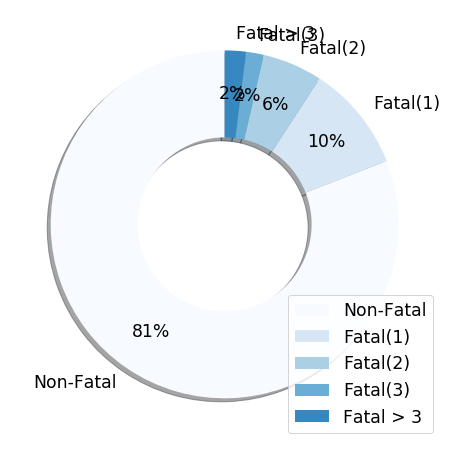

In [1170]:
plt.figure(figsize=(10,8))

plt.pie(pie_fatality, labels = pie_fatality.index, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'size': 'xx-large'},wedgeprops=dict(width=0.5),colors=plt.cm.Blues(np.arange(6)/6.),pctdistance=0.75, labeldistance=1.1);
plt.legend(fontsize = 'xx-large',loc = 'lower right')

In [206]:
pie_phase = data_total.broad_phase_of_flight.value_counts()

In [230]:
pie_phase

LANDING        19850
TAKEOFF        15415
CRUISE         10335
MANEUVERING    10092
APPROACH        7731
TAXI            2211
DESCENT         2125
CLIMB           2095
GO-AROUND       1651
STANDING        1145
UNKNOWN          581
OTHER            141
Name: broad_phase_of_flight, dtype: int64

ValueError: too many values to unpack (expected 2)

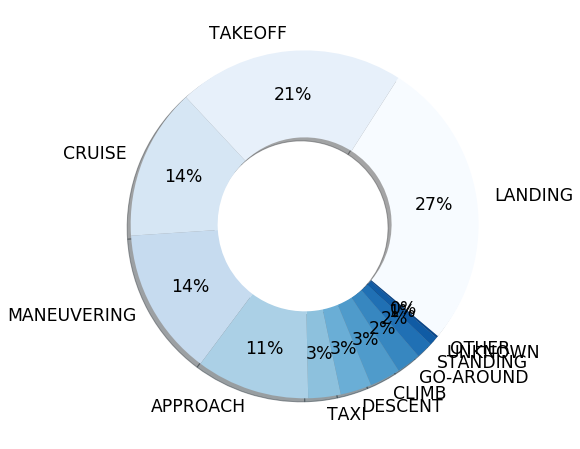

In [1177]:
# plt.figure(figsize=(15,8))
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_phase, labels = pie_phase.index, autopct='%1.0f%%',
        shadow=True, textprops={'size': 'xx-large'},wedgeprops=dict(width=0.5),colors=plt.cm.Blues(np.arange(12)/12.),pctdistance=0.75, labeldistance=1.1, startangle=-40);
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# plt.legend(fontsize = 'xx-large')

In [1192]:
accidents_by_year.index

Int64Index([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='event_date')

Text(0.5, 1.0, 'Annual count of aircraft accidents')

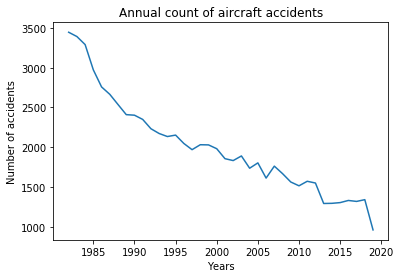

In [1193]:
accidents_by_year = data_total.groupby(data_total.event_date.dt.year)['accident_number'].nunique()
# data.date.dt.year
sns.lineplot(accidents_by_year.index,accidents_by_year)
plt.xlabel('Years')
plt.ylabel("Number of accidents")
plt.title("Annual count of aircraft accidents")

In [234]:
data_total.groupby(data_total.event_date.dt.year).count()

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
event_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1982,3445,168,3419,3415,1607,2093,3444,3443,3445,3445,3445,3445,3419,1,3445,3445,1,3445,1,3438,3431,3445,3445,3443,3445,3445,467,3425,3423,3422,3437,3444
1983,3391,78,7,3351,1894,2115,3391,3388,3391,3390,3391,3391,7,2,3391,3391,2,3390,2,3391,3391,3333,17,3389,3391,3391,564,3385,3375,3379,3382,3391
1984,3290,96,7,3251,1518,1840,3290,3289,3290,3290,3290,3290,7,0,3290,3290,0,3289,0,3290,3289,3243,17,3289,3290,3290,513,3279,3278,3278,3282,3290
1985,2972,113,7,2949,1504,1774,2972,2970,2972,2972,2972,2972,7,0,2972,2972,0,2971,0,2972,2972,2939,14,2966,2972,2972,382,2964,2959,2963,2958,2972
1986,2758,94,7,2729,1501,1656,2758,2756,2758,2758,2758,2758,7,0,2758,2758,0,2758,0,2758,2757,2704,457,2758,2758,2758,365,2754,2747,2750,2749,2757
1987,2665,107,4,2639,1440,1606,2665,2660,2665,2664,2665,2665,4,0,2665,2665,0,2665,0,2665,2665,2630,2663,2660,2665,2665,355,2656,2655,2653,2656,2665
1988,2537,103,9,2513,1368,1488,2537,2531,2537,2537,2537,2537,9,1,2537,2537,1,2537,1,2537,2537,2506,2536,2536,2537,2537,325,2526,2523,2525,2530,2537
1989,2410,103,8,2388,1396,1392,2410,2397,2410,2410,2410,2410,8,1,2410,2410,1,2409,1,2410,2409,2388,2410,2406,2410,2410,339,2404,2401,2396,2400,2410
1990,2404,109,19,2377,1457,1361,2404,2375,2404,2404,2404,2404,19,1,2404,2404,1,2404,1,2403,2404,2367,2404,2402,2404,2404,354,2395,2387,2385,2395,2404


## Data cleaning

In [251]:
train_df.head()

,accident_number,air_carrier,aircraft_category,aircraft_damage,airport_code,airport_name,amateur_built,broad_phase_of_flight,country,engine_type,event_date,event_id,far_description,geo_point,injury_severity,investigation_type,latitude,location,longitude,make,model,number_of_engines,publication_date,purpose_of_flight,registration_number,report_status,schedule,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition,fatality
3886,ERA17LA075,NaN,Airplane,Substantial,NaN,NaN,No,MANEUVERING,United States,Reciprocating,2016-12-27,20161227X00453,Part 91: General Aviation,"[34.985833, -85.722778]",Non-Fatal,Accident,34.985833,"Bridgeport, AL",-85.722778,CESSNA,172,1.0,05/24/2019,Personal,N3772F,Factual,NaN,NaN,1.0,1.0,NaN,VMC,0
3887,CEN17LA090,NaN,Airplane,Substantial,91C,Sauk-Prairie Airport,No,TAXI,United States,Reciprocating,2016-12-28,20170130X43816,Part 91: General Aviation,"[43.297777, -89.755833]",Non-Fatal,Accident,43.297777,"Prairie Du Sac, WI",-89.755833,CESSNA,172B,1.0,11/26/2018,Personal,N6941X,Probable Cause,NaN,NaN,NaN,NaN,2.0,VMC,0
3888,GAA17CA109,NaN,Airplane,Substantial,EZI,KEWANEE MUNI,No,APPROACH,United States,Reciprocating,2016-12-16,20170110X44641,Part 91: General Aviation,"[41.204167, -89.970278]",Non-Fatal,Accident,41.204167,"Kewanee, IL",-89.970278,PIPER,PA28R,1.0,03/13/2017,Personal,N55484,Probable Cause,NaN,NaN,NaN,NaN,2.0,IMC,0
3889,CEN17LA057,NaN,Airplane,Substantial,Y70,Ionia County Airport,No,TAKEOFF,United States,Reciprocating,2016-12-16,20161219X04338,Part 91: General Aviation,"[42.938055, -85.060556]",Non-Fatal,Accident,42.938055,"Ionia, MI",-85.060556,STINSON,108-3,1.0,03/06/2017,Personal,N812C,Probable Cause,NaN,NaN,NaN,NaN,1.0,VMC,0
3890,ANC17LA014,BIDZY TA HOT AANA CORP (DBA: Tanana Air Service),Airplane,Minor,MCG,MC GRATH,No,DESCENT,United States,Reciprocating,2016-11-20,20161221X32443,Part 135: Air Taxi & Commuter,"[62.952778, -155.605556]",Non-Fatal,Accident,62.952778,"McGrath, AK",-155.605556,PIPER,PA 32R-300,1.0,09/10/2018,NaN,N4352F,Probable Cause,NSCH,NaN,NaN,1.0,3.0,VMC,0


In [252]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 33 columns):
accident_number           13111 non-null object
air_carrier               646 non-null object
aircraft_category         12929 non-null object
aircraft_damage           12902 non-null object
airport_code              9145 non-null object
airport_name              9356 non-null object
amateur_built             13074 non-null object
broad_phase_of_flight     10955 non-null object
country                   13111 non-null object
engine_type               12669 non-null object
event_date                13111 non-null datetime64[ns]
event_id                  13111 non-null object
far_description           13000 non-null object
geo_point                 12859 non-null object
injury_severity           13111 non-null object
investigation_type        13111 non-null object
latitude                  12860 non-null float64
location                  13100 non-null object
longitude          

In [253]:
train_df.nunique()

accident_number           13097
air_carrier                 497
aircraft_category            11
aircraft_damage               3
airport_code               4052
airport_name               6208
amateur_built                 2
broad_phase_of_flight        12
country                       1
engine_type                  13
event_date                 3144
event_id                  12930
far_description              15
geo_point                 11336
injury_severity              16
investigation_type            1
latitude                  10112
location                   5861
longitude                 10518
make                       2732
model                      3765
number_of_engines             5
publication_date            830
purpose_of_flight            22
registration_number       12720
report_status                 4
schedule                      2
total_fatal_injuries         15
total_minor_injuries         18
total_serious_injuries        9
total_uninjured             145
weather_

#### Date transformation - feature engineering

In [256]:
train_df['month'] = train_df.event_date.dt.month

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
train_df['weekday'] = train_df.event_date.dt.weekday #The day of the week with Monday=0, Sunday=6

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 35 columns):
accident_number           13111 non-null object
air_carrier               646 non-null object
aircraft_category         12929 non-null object
aircraft_damage           12902 non-null object
airport_code              9145 non-null object
airport_name              9356 non-null object
amateur_built             13074 non-null object
broad_phase_of_flight     10955 non-null object
country                   13111 non-null object
engine_type               12669 non-null object
event_date                13111 non-null datetime64[ns]
event_id                  13111 non-null object
far_description           13000 non-null object
geo_point                 12859 non-null object
injury_severity           13111 non-null object
investigation_type        13111 non-null object
latitude                  12860 non-null float64
location                  13100 non-null object
longitude          

In [274]:
test_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3885
Data columns (total 32 columns):
accident_number           3886 non-null object
air_carrier               184 non-null object
aircraft_category         3852 non-null object
aircraft_damage           3804 non-null object
airport_code              2703 non-null object
airport_name              2659 non-null object
amateur_built             3873 non-null object
broad_phase_of_flight     3125 non-null object
country                   3886 non-null object
engine_type               3305 non-null object
event_date                3886 non-null datetime64[ns]
event_id                  3886 non-null object
far_description           3886 non-null object
geo_point                 3706 non-null object
injury_severity           3886 non-null object
investigation_type        3886 non-null object
latitude                  3706 non-null float64
location                  3883 non-null object
longitude                 3706 non-null

#### Picking columns to work on further

In [458]:
train_columns = ['aircraft_category', 'aircraft_damage', 'amateur_built', 'broad_phase_of_flight', 'engine_type', 'event_date', 'far_description', 'location', 'make', 'model', 'number_of_engines', 'purpose_of_flight', 'weather_condition', 'month', 'weekday', 'fatality']


In [460]:
len(train_columns)

16

In [802]:
train_X = train_df[train_columns]

In [696]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 16 columns):
aircraft_category        12929 non-null object
aircraft_damage          12902 non-null object
amateur_built            13074 non-null object
broad_phase_of_flight    10955 non-null object
engine_type              12669 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13000 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(11)
memory usage: 2.3+ MB


#### Location transformation, filling NA, cleaning

In [697]:
train_X.location.iloc[0][:-4]

'Bridgeport'

In [698]:
train_X[train_X.location.isna()]

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality
9213,Airplane,Substantial,No,MANEUVERING,Reciprocating,2012-09-23,Part 91: General Aviation,NaN,CESSNA,172B,1.0,Personal,VMC,9,6,1
10288,Airplane,Substantial,No,NaN,Reciprocating,2012-04-19,Part 91: General Aviation,NaN,CESSNA,421C,2.0,Personal,VMC,4,3,1
10599,Helicopter,Substantial,No,APPROACH,Turbo Shaft,2012-05-28,Part 135: Air Taxi & Commuter,NaN,BELL,206-L4,1.0,NaN,VMC,5,0,1
10618,Airplane,Substantial,No,UNKNOWN,Reciprocating,2012-03-01,Part 91: General Aviation,NaN,CESSNA,182P,1.0,Personal,VMC,3,3,1
10706,Airplane,NaN,No,CLIMB,Turbo Fan,2011-04-11,Part 121: Air Carrier,NaN,BOEING,777-223,2.0,NaN,VMC,4,0,0
12558,Airplane,NaN,No,NaN,NaN,2010-07-15,Part 121: Air Carrier,NaN,BOEING,767,2.0,NaN,VMC,7,3,0
13117,Airplane,Substantial,No,NaN,Reciprocating,2010-08-14,Part 91: General Aviation,NaN,CESSNA,172N,1.0,Personal,VMC,8,5,0
14049,Airplane,Substantial,No,LANDING,Reciprocating,2009-09-07,Part 91: General Aviation,NaN,CESSNA,172S,1.0,Personal,VMC,9,0,0
14329,Helicopter,Substantial,No,LANDING,Turbo Shaft,2009-12-24,Part 135: Air Taxi & Commuter,NaN,SIKORSKY,S-76C++,2.0,NaN,VMC,12,3,0
14618,Airplane,Substantial,No,UNKNOWN,Turbo Prop,2009-08-29,Part 121: Air Carrier,NaN,BOMBARDIER INC,DHC-8-202,2.0,NaN,NaN,8,5,0


In [699]:
# stripping city - I will focus on states only
train_X.location.apply(lambda x: str(x)[:-4]).value_counts()

Anchorage            62
Talkeetna            53
Atlanta              48
Palmer               47
Fairbanks            46
Phoenix              46
Houston              44
Las Vegas            41
Reno                 38
Albuquerque          38
Miami                36
Lancaster            34
San Diego            31
Mesa                 31
San Antonio          29
Skwentna             28
Oshkosh              26
Titusville           26
Wasilla              26
Caldwell             26
Tucson               25
Boulder              24
Burlington           24
Glendale             23
Columbus             23
Colorado Springs     23
Truckee              23
Arlington            22
West Palm Beach      22
Bethel               22
Springfield          22
Corona               22
Prescott             22
Kenai                21
Jackson              21
Columbia             21
Sedona               21
Chandler             21
Fort Lauderdale      21
Madison              20
Monroe               20
Newark          

In [803]:
train_X['state'] = train_X.location.apply(lambda x:  'unknown' if str(x)[-3:] == 'nan' else str(x)[-2:])
train_X.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK


In [701]:
sorted(train_X['state'].unique())

['AK',
 'AL',
 'AO',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GM',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'ON',
 'OR',
 'PA',
 'PO',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'unknown']

In [702]:
# verification why I have 60 states
train_X[train_X['state'] == 'VI'] #atlantic ocean #DC #unknown #gulf of mexico #guam #mariana islands # ontario #pacific ocean #puerto rico # virgin island

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state
4388,Airplane,Destroyed,No,LANDING,Reciprocating,2016-08-07,Part 91: General Aviation,"St. Croix, VI",DIAMOND,DA20,1.0,Instructional,VMC,8,6,0,VI
9964,Airplane,Substantial,No,DESCENT,Reciprocating,2012-10-13,Part 91: General Aviation,"Charlotte Amalie, VI",PIPER,PA-23-250,2.0,Business,VMC,10,5,1,VI
11555,Airplane,Substantial,No,TAKEOFF,Reciprocating,2011-01-17,Part 91: General Aviation,"Charlotte Amalie, VI",CONVAIR,340-71,2.0,Positioning,VMC,1,0,0,VI
13089,Airplane,Substantial,No,TAXI,Reciprocating,2010-12-13,Part 135: Air Taxi & Commuter,"St. Thomas, VI",CESSNA,172,1.0,NaN,VMC,12,0,0,VI
14979,Airplane,Destroyed,NaN,MANEUVERING,Reciprocating,2009-10-29,Part 91: General Aviation,"Christiansted, VI",CESSNA,177,1.0,Personal,VMC,10,3,1,VI
16615,Airplane,Substantial,No,NaN,Reciprocating,2008-06-01,Part 135: Air Taxi & Commuter,"Charlotte Amali, VI",AERO COMMANDER,500-B,2.0,NaN,VMC,6,6,0,VI


#### Makers transformation, filling NA, cleaning

In [703]:
train_X.make.nunique()

2732

In [704]:
train_X.make.apply(lambda x: 'unknown' if str(x).lower() == 'nan' else str(x).lower()).value_counts()

cessna                            3293
piper                             1923
beech                              676
bell                               302
boeing                             178
mooney                             167
robinson helicopter                155
air tractor inc                    154
cirrus design corp                 125
bellanca                           122
schweizer                          119
maule                              108
robinson helicopter company        107
aeronca                            106
hughes                              90
robinson                            82
eurocopter                          74
luscombe                            72
stinson                             69
champion                            66
dehavilland                         65
north american                      60
grumman                             58
air tractor                         58
aviat aircraft inc                  56
taylorcraft              

In [804]:
train_X['make_transformed'] = train_X.make.apply(lambda x: 'unknown' if str(x).lower() == 'nan' else str((str(x).lower().replace('/',' ').replace(',',' ').replace('-',' ')).split(' ')[0]))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [805]:
# make_transformed - 30 most common producers of aircrafts
# make_transformed_all - all producers
makers = list(train_X.make_transformed.value_counts()[:30].index)
makers.append('unknown')
train_X['make_transformed_all'] = train_X.make_transformed
train_X.make_transformed = train_X.make_transformed.apply(lambda x: x if x in list(makers) else 'other')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [806]:
makers

['cessna',
 'piper',
 'beech',
 'robinson',
 'bell',
 'air',
 'mooney',
 'boeing',
 'grumman',
 'cirrus',
 'schweizer',
 'bellanca',
 'maule',
 'aeronca',
 'hughes',
 'eurocopter',
 'american',
 'aviat',
 'diamond',
 'north',
 'luscombe',
 'aero',
 'stinson',
 'champion',
 'dehavilland',
 'taylorcraft',
 'airbus',
 'rockwell',
 'mcdonnell',
 'ayres',
 'unknown']

In [807]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 19 columns):
aircraft_category        12929 non-null object
aircraft_damage          12902 non-null object
amateur_built            13074 non-null object
broad_phase_of_flight    10955 non-null object
engine_type              12669 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13000 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-n

In [808]:
train_X.nunique()

aircraft_category          11
aircraft_damage             3
amateur_built               2
broad_phase_of_flight      12
engine_type                13
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           5
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
dtype: int64

In [809]:
train_X[train_X.make_transformed_all.isin(list((train_X.make.apply(lambda x: 'unknown' if str(x).lower() == 'nan' else str((str(x).lower().replace('/',' ').replace(',',' ').replace('-',' ')).split(' ')[0])).value_counts()).index[500:]))].amateur_built.value_counts()

Yes    1084
No      215
Name: amateur_built, dtype: int64

#### Engine type

In [810]:
train_df.engine_type.value_counts()

Reciprocating       11004
Turbo Prop            669
Turbo Shaft           607
Turbo Fan             285
Turbo Jet              69
Unknown                20
None                    7
Electric                3
REC, TJ, TJ             1
REC, ELEC               1
REC, TJ, REC, TJ        1
Hybrid Rocket           1
TJ, REC, REC, TJ        1
Name: engine_type, dtype: int64

In [811]:
# filling NA with no engine if count = 0, else - unknown

def engine_fill(df):
    cond = (df.engine_type.isna()) & (df.number_of_engines == 0)
    df.loc[cond,'engine_type'] = df.loc[cond,'engine_type'].fillna("None")
    df.loc[:,'engine_type'] = df.loc[:,'engine_type'].fillna('Unknown')
    return df

In [812]:
engine_fill(train_X)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK,piper,piper
3891,Airplane,Substantial,No,LANDING,Reciprocating,2016-11-14,Part 91: General Aviation,"Lincoln, CA",CESSNA,120,1.0,Personal,VMC,11,0,0,CA,cessna,cessna
3892,Airplane,Substantial,No,APPROACH,Reciprocating,2016-11-11,Part 91: General Aviation,"Payallup, WA",PIPER,PA 28R,1.0,Personal,VMC,11,4,0,WA,piper,piper
3893,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-10-29,Part 91: General Aviation,"Dallas, TX",NORTH AMERICAN,TB 25N,2.0,Air Race/Show,VMC,10,5,0,TX,north,north
3894,Airplane,Substantial,No,NaN,Reciprocating,2016-10-28,Part 91: General Aviation,"Bloomfield, NM",CIRRUS DESIGN CORP,SR22,1.0,Personal,VMC,10,4,0,NM,cirrus,cirrus
3895,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-10-23,Part 91: General Aviation,"Buffalo, WY",CESSNA,182Q,1.0,Personal,VMC,10,6,0,WY,cessna,cessna


In [814]:
train_X.engine_type.value_counts()

Reciprocating       11004
Turbo Prop            669
Turbo Shaft           607
Turbo Fan             285
Unknown               250
None                  219
Turbo Jet              69
Electric                3
REC, TJ, TJ             1
REC, ELEC               1
REC, TJ, REC, TJ        1
Hybrid Rocket           1
TJ, REC, REC, TJ        1
Name: engine_type, dtype: int64

In [815]:
# stripping only to one type of engine
engines = list(train_X.engine_type.value_counts()[:7].index)
train_X.engine_type = train_X.engine_type.apply(lambda x: x if x in engines else 'other') # hybrid, electric, multi

In [953]:
train_X.engine_type = train_X.engine_type.apply(lambda x: x.replace(' ', '_'))

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [954]:
train_X.engine_type.value_counts()

Reciprocating    11004
Turbo_Prop         669
Turbo_Shaft        607
Turbo_Fan          285
Unknown            250
None               219
Turbo_Jet           69
other                8
Name: engine_type, dtype: int64

In [817]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 19 columns):
aircraft_category        12929 non-null object
aircraft_damage          12902 non-null object
amateur_built            13074 non-null object
broad_phase_of_flight    10955 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13000 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-n

In [818]:
train_X.nunique()

aircraft_category          11
aircraft_damage             3
amateur_built               2
broad_phase_of_flight      12
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           5
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
dtype: int64

#### Far description

In [819]:
train_X.far_description.value_counts()

Part 91: General Aviation            11411
Part 137: Agricultural                 671
Part 135: Air Taxi & Commuter          413
Part 121: Air Carrier                  227
Public Use                             133
Part 133: Rotorcraft Ext. Load          64
Public Aircraft                         38
Part 129: Foreign                       20
Part 91 Subpart K: Fractional            6
Unknown                                  6
Part 125: 20+ Pax,6000+ lbs              3
Non-U.S., Non-Commercial                 3
Part 103: Ultralight                     2
Armed Forces                             2
Part 437: Commercial Space Flight        1
Name: far_description, dtype: int64

In [820]:
# not many NA - filled with unknown category
train_X.far_description.fillna('Unknown', inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [821]:
train_X.far_description.value_counts()

Part 91: General Aviation            11411
Part 137: Agricultural                 671
Part 135: Air Taxi & Commuter          413
Part 121: Air Carrier                  227
Public Use                             133
Unknown                                117
Part 133: Rotorcraft Ext. Load          64
Public Aircraft                         38
Part 129: Foreign                       20
Part 91 Subpart K: Fractional            6
Part 125: 20+ Pax,6000+ lbs              3
Non-U.S., Non-Commercial                 3
Part 103: Ultralight                     2
Armed Forces                             2
Part 437: Commercial Space Flight        1
Name: far_description, dtype: int64

In [822]:
far_list = list(train_X.far_description.value_counts()[:9].index)

In [823]:
train_X.far_description.apply(lambda x: x if x in far_list else 'other')

3886         Part 91: General Aviation
3887         Part 91: General Aviation
3888         Part 91: General Aviation
3889         Part 91: General Aviation
3890     Part 135: Air Taxi & Commuter
3891         Part 91: General Aviation
3892         Part 91: General Aviation
3893         Part 91: General Aviation
3894         Part 91: General Aviation
3895         Part 91: General Aviation
3896         Part 91: General Aviation
3897         Part 91: General Aviation
3898         Part 91: General Aviation
3899         Part 91: General Aviation
3900         Part 91: General Aviation
3901         Part 91: General Aviation
3902         Part 91: General Aviation
3903         Part 91: General Aviation
3904         Part 91: General Aviation
3905         Part 91: General Aviation
3906         Part 91: General Aviation
3907         Part 91: General Aviation
3908         Part 91: General Aviation
3909         Part 91: General Aviation
3910         Part 91: General Aviation
3911         Part 91: Gen

In [966]:
# stripping to most common far applications

train_X['far_transformed'] = train_X.far_description.apply(lambda x: x.replace(' ','_').replace(':','').replace('.','').replace('&','') if x in far_list else 'other')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [967]:
train_X.far_transformed.value_counts()

Part_91_General_Aviation        11411
Part_137_Agricultural             671
Part_135_Air_Taxi__Commuter       413
Part_121_Air_Carrier              227
Public_Use                        133
Unknown                           117
Part_133_Rotorcraft_Ext_Load       64
Public_Aircraft                    38
Part_129_Foreign                   20
other                              17
Name: far_transformed, dtype: int64

In [826]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        12929 non-null object
aircraft_damage          12902 non-null object
amateur_built            13074 non-null object
broad_phase_of_flight    10955 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-n

In [827]:
train_X.nunique()

aircraft_category          11
aircraft_damage             3
amateur_built               2
broad_phase_of_flight      12
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           5
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

In [828]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


#### Phase of flight

In [829]:
train_X.broad_phase_of_flight.value_counts()

LANDING        3707
TAKEOFF        2644
MANEUVERING    1632
APPROACH       1130
CRUISE          401
TAXI            337
DESCENT         304
STANDING        264
GO-AROUND       244
CLIMB           211
UNKNOWN          56
OTHER            25
Name: broad_phase_of_flight, dtype: int64

In [830]:
train_X.broad_phase_of_flight.isna().sum()

2156

In [871]:
# for now I will leave it as not-specified, for fatality maybe a predictor of small damage, may drop for prediction of phase of flight

In [873]:
train_X.broad_phase_of_flight.fillna('NOT-SPECIFIED', inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Aircraft category

In [832]:
train_X.aircraft_category.value_counts()

Airplane             11108
Helicopter            1267
Glider                 241
Balloon                106
Weight-Shift            69
Gyrocraft               52
Powered Parachute       50
Gyroplane               17
Ultralight              17
Rocket                   1
Unknown                  1
Name: aircraft_category, dtype: int64

In [833]:
train_X.aircraft_category.isna().sum()

182

In [834]:
train_X[train_X.aircraft_category == 'Helicopter'].make_transformed.value_counts()

robinson      347
bell          327
other         280
eurocopter     91
hughes         89
schweizer      66
mcdonnell      36
airbus         21
american        9
boeing          1
Name: make_transformed, dtype: int64

In [835]:
train_X[train_X.aircraft_category.isna()].far_transformed.value_counts()

Unknown                          111
Part_91_General_Aviation          69
Part_133_Rotorcraft_Ext._Load      1
Part_121_Air_Carrier               1
Name: far_transformed, dtype: int64

In [969]:
# filling missing values based on other columns in dataset

def aircraft_cat_fill(df):
    cond_ga_heli= (df.aircraft_category.isna()) & (df.make_transformed.isin(['robinson', 'bell','eurocopter']))
    cond_airplane = (df.aircraft_category.isna()) & (df.far_transformed == 'Part_91_General_Aviation')
    cond_heli = (df.aircraft_category.isna()) & (df.far_transformed == 'Part_133_Rotorcraft_Ext_Load')
    cond_airlines = (df.aircraft_category.isna()) & (df.far_transformed == 'Part_121_Air_Carrier')
    df.loc[cond_ga_heli,'aircraft_category'] = df.loc[cond_ga_heli,'aircraft_category'].fillna("Helicopter")
    df.loc[cond_airplane,'aircraft_category'] = df.loc[cond_airplane,'aircraft_category'].fillna("Airplane")
    df.loc[cond_heli,'aircraft_category'] = df.loc[cond_heli,'aircraft_category'].fillna("Helicopter")
    df.loc[cond_airlines,'aircraft_category'] = df.loc[cond_airlines,'aircraft_category'].fillna("Airplane")
    df.loc[:,'aircraft_category'].fillna('Unknown', inplace = True)
    df.aircraft_category = df.aircraft_category.apply(lambda x: x.replace(' ', '_'))
    return df

In [944]:
aircraft_cat_fill(train_X)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter
3891,Airplane,Substantial,No,LANDING,Reciprocating,2016-11-14,Part 91: General Aviation,"Lincoln, CA",CESSNA,120,1,Personal,VMC,11,0,0,CA,cessna,cessna,Part_91_General_Aviation
3892,Airplane,Substantial,No,APPROACH,Reciprocating,2016-11-11,Part 91: General Aviation,"Payallup, WA",PIPER,PA 28R,1,Personal,VMC,11,4,0,WA,piper,piper,Part_91_General_Aviation
3893,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-10-29,Part 91: General Aviation,"Dallas, TX",NORTH AMERICAN,TB 25N,2,Air_Race_Show,VMC,10,5,0,TX,north,north,Part_91_General_Aviation
3894,Airplane,Substantial,No,NOT-SPECIFIED,Reciprocating,2016-10-28,Part 91: General Aviation,"Bloomfield, NM",CIRRUS DESIGN CORP,SR22,1,Personal,VMC,10,4,0,NM,cirrus,cirrus,Part_91_General_Aviation
3895,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-10-23,Part 91: General Aviation,"Buffalo, WY",CESSNA,182Q,1,Personal,VMC,10,6,0,WY,cessna,cessna,Part_91_General_Aviation


In [945]:
train_X.aircraft_category.value_counts()

Airplane             11178
Helicopter            1273
Glider                 241
Unknown                107
Balloon                106
Weight-Shift            69
Gyrocraft               52
Powered_Parachute       50
Gyroplane               17
Ultralight              17
Rocket                   1
Name: aircraft_category, dtype: int64

In [874]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          12902 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-n

In [875]:
train_X.nunique()

aircraft_category          11
aircraft_damage             3
amateur_built               2
broad_phase_of_flight      13
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           5
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

In [876]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


#### Aircraft damage

In [842]:
train_X[train_X.aircraft_damage.isna()]

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3935,Airplane,NaN,No,DESCENT,Turbo Fan,2016-01-28,Part 121: Air Carrier,"Titusville, FL",BOEING,737 7H4,2.0,NaN,VMC,1,3,0,FL,boeing,boeing,Part_121_Air_Carrier
3959,Helicopter,NaN,NaN,TAKEOFF,Unknown,2016-09-02,Part 91: General Aviation,"Honolulu, HI",MCDONNELL DOUGLAS HELICOPTER,500,NaN,Public Aircraft - Local,VMC,9,4,0,HI,mcdonnell,mcdonnell,Part_91_General_Aviation
3994,Balloon,NaN,No,STANDING,Unknown,2016-11-14,Part 91: General Aviation,"Winters, CA",CAMERON,A315,3.0,Aerial Observation,VMC,11,0,0,CA,other,cameron,Part_91_General_Aviation
4015,Airplane,NaN,No,DESCENT,Turbo Fan,2016-07-26,Part 121: Air Carrier,"Cleveland, OH",EMBRAER,ERJ 170 100 SE,2.0,NaN,VMC,7,1,0,OH,other,embraer,Part_121_Air_Carrier
4026,Airplane,NaN,No,APPROACH,Turbo Fan,2016-06-05,Part 121: Air Carrier,"Las Vegas, NV",BOEING,737-932ER,2.0,NaN,VMC,6,6,0,NV,boeing,boeing,Part_121_Air_Carrier
4090,Airplane,NaN,No,UNKNOWN,Reciprocating,2016-12-30,Part 91: General Aviation,"Open water, HI",CESSNA,172M,1.0,Personal,VMC,12,4,1,HI,cessna,cessna,Part_91_General_Aviation
4135,Airplane,NaN,No,DESCENT,Turbo Fan,2016-12-13,Part 121: Air Carrier,"Denver, CO",BOEING,737 824,2.0,NaN,IMC,12,1,0,CO,boeing,boeing,Part_121_Air_Carrier
4152,Balloon,NaN,No,LANDING,Unknown,2016-08-06,Part 91: General Aviation,"Northwood, NH",BALLOON WORKS,FIREFLY8,NaN,Personal,VMC,8,5,0,NH,other,balloon,Part_91_General_Aviation
4161,Unknown,NaN,No,NaN,Unknown,2016-07-17,Unknown,"Emmett, ID",UNKNOWN,UNKNOWN,NaN,NaN,VMC,7,6,0,ID,unknown,unknown,Unknown
4563,Glider,NaN,No,LANDING,None,2016-11-05,Part 91: General Aviation,"Port Matilda, PA",SCHEMPP-HIRTH FLUGZEUGBAU,DUO DISCUS,0.0,Personal,VMC,11,5,0,PA,other,schempp,Part_91_General_Aviation


In [843]:
train_X.aircraft_damage.isna().sum()

209

In [878]:
train_X.aircraft_damage.value_counts()

Substantial    11855
Destroyed        920
Minor            127
Name: aircraft_damage, dtype: int64

In [879]:
train_X.aircraft_damage.fillna('NOT-SPECIFIED', inplace = True)

In [844]:
# leave_for now as not specified- maybe not-specified is for small damages (?), aircraft damage can make significant role in prediction

#### Amateur built

In [845]:
train_X.amateur_built.value_counts()

No     11253
Yes     1821
Name: amateur_built, dtype: int64

In [847]:
train_X.make.value_counts()

CESSNA                            3071
PIPER                             1802
BEECH                              637
BELL                               291
Cessna                             222
BOEING                             175
ROBINSON HELICOPTER                153
AIR TRACTOR INC                    152
MOONEY                             151
CIRRUS DESIGN CORP                 124
Piper                              121
BELLANCA                           110
SCHWEIZER                          107
AERONCA                            102
ROBINSON HELICOPTER COMPANY        102
MAULE                              100
HUGHES                              84
EUROCOPTER                          73
LUSCOMBE                            67
STINSON                             65
DEHAVILLAND                         64
CHAMPION                            64
NORTH AMERICAN                      54
AVIAT AIRCRAFT INC                  53
ROBINSON                            52
DIAMOND AIRCRAFT IND INC 

In [848]:
train_X[train_X.amateur_built.isna()]

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3959,Helicopter,NaN,NaN,TAKEOFF,Unknown,2016-09-02,Part 91: General Aviation,"Honolulu, HI",MCDONNELL DOUGLAS HELICOPTER,500,NaN,Public Aircraft - Local,VMC,9,4,0,HI,mcdonnell,mcdonnell,Part_91_General_Aviation
4482,Helicopter,Substantial,NaN,MANEUVERING,Turbo Shaft,2016-07-02,Part 137: Agricultural,"Brawley, CA",BELL,OH 58A,1.0,Aerial Application,VMC,7,5,0,CA,bell,bell,Part_137_Agricultural
5028,Airplane,Substantial,NaN,NaN,Unknown,2016-02-17,Part 121: Air Carrier,"Detroit, MI",BOEING,737 7H4,2.0,NaN,NaN,2,2,0,MI,boeing,boeing,Part_121_Air_Carrier
6411,Airplane,Substantial,NaN,NaN,Unknown,2015-05-04,Part 121: Air Carrier,"Phoenix, AZ",BOMBARDIER INC,CL600 2D24,NaN,NaN,NaN,5,0,0,AZ,other,bombardier,Part_121_Air_Carrier
7680,Airplane,NaN,NaN,NaN,Turbo Fan,2014-02-17,Part 121: Air Carrier,"Billings, MT",BOEING,737-700,2.0,NaN,NaN,2,0,0,MT,boeing,boeing,Part_121_Air_Carrier
8011,Airplane,Substantial,NaN,NaN,Unknown,2013-01-25,Part 121: Air Carrier,"Denver, CO",MCDONNELL DOUGLAS,MD11,NaN,NaN,NaN,1,4,0,CO,mcdonnell,mcdonnell,Part_121_Air_Carrier
11092,Airplane,Substantial,NaN,APPROACH,Turbo Prop,2011-05-19,Part 91: General Aviation,"Salem, OH",SOCATA,TBM-850,1.0,Business,IMC,5,3,0,OH,other,socata,Part_91_General_Aviation
11389,Airplane,NaN,NaN,CLIMB,Unknown,2011-09-12,Part 129: Foreign,"Montauk, AO",BOEING,777,NaN,NaN,NaN,9,0,0,AO,boeing,boeing,Part_129_Foreign
12534,Airplane,Substantial,NaN,DESCENT,Reciprocating,2010-11-04,Part 91: General Aviation,"Fruitvale, TX",Siai-Marchetti,S.205/22R,1.0,Business,VMC,11,3,0,TX,other,siai,Part_91_General_Aviation
12654,Airplane,Substantial,NaN,LANDING,Reciprocating,2010-09-22,Part 91: General Aviation,"Longmont, CO",CESSNA,172S,1.0,Personal,VMC,9,2,0,CO,cessna,cessna,Part_91_General_Aviation


In [849]:
train_X.make_transformed.value_counts()

other          3928
cessna         3316
piper          1942
beech           676
robinson        351
bell            329
air             231
mooney          202
boeing          181
grumman         175
cirrus          166
schweizer       136
bellanca        122
maule           108
aeronca         107
hughes           96
eurocopter       92
american         91
aviat            87
diamond          76
north            75
luscombe         73
aero             70
stinson          69
champion         66
dehavilland      65
taylorcraft      58
airbus           57
rockwell         55
mcdonnell        54
ayres            49
unknown           8
Name: make_transformed, dtype: int64

In [850]:
# filling based on makers - if popular then not amateur built
def amateur_fill(df):
    cond = (df.amateur_built.isna()) & (df.make_transformed == 'unknown')
    df.loc[cond,'amateur_built'] = df.loc[cond,'amateur_built'].fillna("Yes")
    df.loc[:,'amateur_built'] = df.loc[:,'amateur_built'].fillna('No')
    return df

In [851]:
amateur_fill(train_X)

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter
3891,Airplane,Substantial,No,LANDING,Reciprocating,2016-11-14,Part 91: General Aviation,"Lincoln, CA",CESSNA,120,1.0,Personal,VMC,11,0,0,CA,cessna,cessna,Part_91_General_Aviation
3892,Airplane,Substantial,No,APPROACH,Reciprocating,2016-11-11,Part 91: General Aviation,"Payallup, WA",PIPER,PA 28R,1.0,Personal,VMC,11,4,0,WA,piper,piper,Part_91_General_Aviation
3893,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-10-29,Part 91: General Aviation,"Dallas, TX",NORTH AMERICAN,TB 25N,2.0,Air Race/Show,VMC,10,5,0,TX,north,north,Part_91_General_Aviation
3894,Airplane,Substantial,No,NaN,Reciprocating,2016-10-28,Part 91: General Aviation,"Bloomfield, NM",CIRRUS DESIGN CORP,SR22,1.0,Personal,VMC,10,4,0,NM,cirrus,cirrus,Part_91_General_Aviation
3895,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-10-23,Part 91: General Aviation,"Buffalo, WY",CESSNA,182Q,1.0,Personal,VMC,10,6,0,WY,cessna,cessna,Part_91_General_Aviation


In [852]:
train_X.shape

(13111, 20)

In [880]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


In [881]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        12788 non-null float64
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-n

In [882]:
train_X.nunique()

aircraft_category          11
aircraft_damage             4
amateur_built               2
broad_phase_of_flight      13
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           5
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

#### Number of engines

In [856]:
train_X.number_of_engines.value_counts()

1.0    11305
2.0     1240
0.0      216
4.0       19
3.0        8
Name: number_of_engines, dtype: int64

In [889]:
train_X.number_of_engines.isna().sum()

323

In [863]:
train_X[train_X.number_of_engines == 0].aircraft_category.value_counts()

Glider      159
Balloon      54
Airplane      2
Unknown       1
Name: aircraft_category, dtype: int64

In [886]:
train_X[train_X.number_of_engines.isna()].aircraft_category.value_counts()

Airplane             205
Balloon               44
Glider                36
Helicopter            28
Weight-Shift           3
Unknown                3
Powered Parachute      2
Ultralight             1
Gyroplane              1
Name: aircraft_category, dtype: int64

In [911]:
# filling based on type of aircraft
def num_of_eng_fill(df):
    cond_num_eng = (df.number_of_engines.isna()) & (df.aircraft_category.isin(['Glider', 'Balloon']))
    df.loc[cond_num_eng,'number_of_engines'] = df.loc[cond_num_eng,'number_of_engines'].fillna(0)
    df.loc[:,'number_of_engines'].fillna('Unknown', inplace = True)
    return df

In [893]:
num_of_eng_fill(train_X)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter
3891,Airplane,Substantial,No,LANDING,Reciprocating,2016-11-14,Part 91: General Aviation,"Lincoln, CA",CESSNA,120,1,Personal,VMC,11,0,0,CA,cessna,cessna,Part_91_General_Aviation
3892,Airplane,Substantial,No,APPROACH,Reciprocating,2016-11-11,Part 91: General Aviation,"Payallup, WA",PIPER,PA 28R,1,Personal,VMC,11,4,0,WA,piper,piper,Part_91_General_Aviation
3893,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-10-29,Part 91: General Aviation,"Dallas, TX",NORTH AMERICAN,TB 25N,2,Air Race/Show,VMC,10,5,0,TX,north,north,Part_91_General_Aviation
3894,Airplane,Substantial,No,NOT-SPECIFIED,Reciprocating,2016-10-28,Part 91: General Aviation,"Bloomfield, NM",CIRRUS DESIGN CORP,SR22,1,Personal,VMC,10,4,0,NM,cirrus,cirrus,Part_91_General_Aviation
3895,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-10-23,Part 91: General Aviation,"Buffalo, WY",CESSNA,182Q,1,Personal,VMC,10,6,0,WY,cessna,cessna,Part_91_General_Aviation


In [894]:
train_X.number_of_engines.value_counts()

1.0        11305
2.0         1240
0.0          296
Unknown      243
4.0           19
3.0            8
Name: number_of_engines, dtype: int64

In [895]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,NaN,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


In [896]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        13111 non-null object
purpose_of_flight        12432 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-nu

In [897]:
train_X.nunique()

aircraft_category          11
aircraft_damage             4
amateur_built               2
broad_phase_of_flight      13
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           6
purpose_of_flight          22
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

#### Purpose of flight

In [898]:
train_X.purpose_of_flight.value_counts()

Personal                     8410
Instructional                1658
Aerial Application            675
Business                      322
Positioning                   262
Other Work Use                168
Flight Test                   156
Aerial Observation            152
Skydiving                      77
Air Race/Show                  75
Ferry                          65
External Load                  59
Banner Tow                     59
Public Aircraft - Federal      58
Executive/Corporate            50
Public Aircraft - Local        48
Public Aircraft - State        43
Glider Tow                     31
Unknown                        26
Public Aircraft                24
Firefighting                    9
Air Drop                        5
Name: purpose_of_flight, dtype: int64

In [899]:
train_X.purpose_of_flight.isna().sum()

679

In [901]:
train_X[train_X.purpose_of_flight.isna()].far_transformed.value_counts()

Part_135_Air_Taxi_&_Commuter    411
Part_121_Air_Carrier            226
Part_129_Foreign                 20
Unknown                          12
other                             9
Part_91_General_Aviation          1
Name: far_transformed, dtype: int64

In [970]:
train_X[train_X.far_transformed == 'Part_135_Air_Taxi__Commuter'].purpose_of_flight.value_counts()

Air_Carrier    411
Business         1
Unknown          1
Name: purpose_of_flight, dtype: int64

In [908]:
train_X[train_X.far_transformed == 'Part_121_Air_Carrier'].purpose_of_flight.value_counts()

Positioning    1
Name: purpose_of_flight, dtype: int64

In [910]:
train_X[train_X.far_transformed == 'Part_129_Foreign']#.purpose_of_flight.value_counts()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
5378,Airplane,Substantial,No,TAKEOFF,Turbo Fan,2015-09-08,Part 129: Foreign,"Las Vegas, NV",BOEING COMPANY,BOEING 777-236,2,NaN,VMC,9,1,0,NV,boeing,boeing,Part_129_Foreign
5796,Airplane,Substantial,No,LANDING,Turbo Fan,2015-12-23,Part 129: Foreign,"Telluride, CO",HAWKER,400,Unknown,NaN,IMC,12,2,0,CO,other,hawker,Part_129_Foreign
6224,Airplane,NOT-SPECIFIED,No,DESCENT,Turbo Fan,2015-05-27,Part 129: Foreign,"Windsor Locks, CT",BOEING,777 - 236,2,NaN,VMC,5,2,0,CT,boeing,boeing,Part_129_Foreign
7783,Airplane,Minor,No,TAXI,Turbo Fan,2014-10-05,Part 129: Foreign,"Jamaica, NY",AIRBUS,A340-212,4,NaN,VMC,10,6,0,NY,airbus,airbus,Part_129_Foreign
7891,Airplane,Substantial,No,NOT-SPECIFIED,Unknown,2013-01-17,Part 129: Foreign,"Miami, FL",BOEING,777 - 300,Unknown,NaN,VMC,1,3,0,FL,boeing,boeing,Part_129_Foreign
8065,Airplane,Minor,No,NOT-SPECIFIED,Unknown,2013-05-01,Part 129: Foreign,"Newark, NJ",AIRBUS,A330,2,NaN,NaN,5,2,0,NJ,airbus,airbus,Part_129_Foreign
8861,Airplane,Destroyed,No,APPROACH,Turbo Fan,2013-07-06,Part 129: Foreign,"San Francisco, CA",BOEING,777-200ER,2,NaN,VMC,7,5,1,CA,boeing,boeing,Part_129_Foreign
8948,Airplane,Minor,No,NOT-SPECIFIED,Unknown,2013-01-17,Part 129: Foreign,"Miami, FL",AIRBUS,A340 - 300,Unknown,NaN,VMC,1,3,0,FL,airbus,airbus,Part_129_Foreign
9362,Airplane,Substantial,No,TAKEOFF,Turbo Fan,2012-09-20,Part 129: Foreign,"New Haven, CT",LEARJET,36A,2,NaN,VMC,9,3,0,CT,other,learjet,Part_129_Foreign
10032,Airplane,Minor,No,TAXI,Turbo Fan,2012-08-10,Part 129: Foreign,"Dulles, VA",AIRBUS,A330,2,NaN,VMC,8,4,0,VA,airbus,airbus,Part_129_Foreign


In [971]:
# filling based on far descfription

def purpose_fill(df):
    cond_carrier = (df.purpose_of_flight.isna()) & (df.far_transformed.isin(['Part_135_Air_Taxi__Commuter', 'Part_121_Air_Carrier','Part_129_Foreign']))
    df.loc[cond_carrier,'purpose_of_flight'] = df.loc[cond_carrier,'purpose_of_flight'].fillna('Air_Carrier')
    df.loc[:,'purpose_of_flight'].fillna('Unknown', inplace = True)
    df.purpose_of_flight = df.purpose_of_flight.apply(lambda x: x.replace('-', '').replace('/', ' ').replace(' ', '_'))
    return df

In [925]:
purpose_fill(train_X)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter
3891,Airplane,Substantial,No,LANDING,Reciprocating,2016-11-14,Part 91: General Aviation,"Lincoln, CA",CESSNA,120,1,Personal,VMC,11,0,0,CA,cessna,cessna,Part_91_General_Aviation
3892,Airplane,Substantial,No,APPROACH,Reciprocating,2016-11-11,Part 91: General Aviation,"Payallup, WA",PIPER,PA 28R,1,Personal,VMC,11,4,0,WA,piper,piper,Part_91_General_Aviation
3893,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-10-29,Part 91: General Aviation,"Dallas, TX",NORTH AMERICAN,TB 25N,2,Air_Race_Show,VMC,10,5,0,TX,north,north,Part_91_General_Aviation
3894,Airplane,Substantial,No,NOT-SPECIFIED,Reciprocating,2016-10-28,Part 91: General Aviation,"Bloomfield, NM",CIRRUS DESIGN CORP,SR22,1,Personal,VMC,10,4,0,NM,cirrus,cirrus,Part_91_General_Aviation
3895,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-10-23,Part 91: General Aviation,"Buffalo, WY",CESSNA,182Q,1,Personal,VMC,10,6,0,WY,cessna,cessna,Part_91_General_Aviation


In [926]:
train_X.purpose_of_flight.value_counts()

Personal                    8410
Instructional               1658
Aerial_Application           675
Air_Carrier                  657
Business                     322
Positioning                  262
Other_Work_Use               168
Flight_Test                  156
Aerial_Observation           152
Skydiving                     77
Air_Race_Show                 75
Ferry                         65
External_Load                 59
Banner_Tow                    59
Public_Aircraft__Federal      58
Executive_Corporate           50
Unknown                       48
Public_Aircraft__Local        48
Public_Aircraft__State        43
Glider_Tow                    31
Public_Aircraft               24
Firefighting                   9
Air_Drop                       5
Name: purpose_of_flight, dtype: int64

In [927]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


In [928]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        13111 non-null object
purpose_of_flight        13111 non-null object
weather_condition        13051 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-nu

In [929]:
train_X.nunique()

aircraft_category          11
aircraft_damage             4
amateur_built               2
broad_phase_of_flight      13
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           6
purpose_of_flight          23
weather_condition           3
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

#### Weather

In [931]:
train_X.weather_condition.value_counts()

VMC    12400
IMC      620
UNK       31
Name: weather_condition, dtype: int64

In [934]:
train_X[train_X.weather_condition.isna()]

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3942,Airplane,Substantial,No,LANDING,Reciprocating,2016-12-11,Part 91: General Aviation,"Anacortes, WA",BEECH,A23 24,1,Personal,NaN,12,6,0,WA,beech,beech,Part_91_General_Aviation
3953,Airplane,Substantial,Yes,CLIMB,Turbo Prop,2016-10-01,Part 91: General Aviation,"Iola, KS",AERO SMART SOLUTIONS INC,LANCAIR EVOLUTION,1,Personal,NaN,10,5,0,KS,aero,aero,Part_91_General_Aviation
4024,Airplane,Substantial,No,NOT-SPECIFIED,Unknown,2016-06-06,Part 91: General Aviation,"East St. Louis, IL",AERONCA,7AC,Unknown,Personal,NaN,6,0,0,IL,aeronca,aeronca,Part_91_General_Aviation
4177,Airplane,Substantial,No,NOT-SPECIFIED,Unknown,2016-04-28,Part 121: Air Carrier,"San Francisco, CA",BOMBARDIER INC,CL 600 2B19,2,Air_Carrier,NaN,4,3,0,CA,other,bombardier,Part_121_Air_Carrier
4230,Airplane,Substantial,No,LANDING,Reciprocating,2016-12-20,Part 91: General Aviation,"Longville, MN",CESSNA,210N,1,Personal,NaN,12,1,0,MN,cessna,cessna,Part_91_General_Aviation
4375,Airplane,Substantial,No,LANDING,Reciprocating,2016-10-18,Part 91: General Aviation,"Austin, TX",STINSON,108,1,Personal,NaN,10,1,0,TX,stinson,stinson,Part_91_General_Aviation
4650,Airplane,Minor,No,NOT-SPECIFIED,Unknown,2016-02-17,Part 121: Air Carrier,"Detroit, MI",BOEING,737,2,Air_Carrier,NaN,2,2,0,MI,boeing,boeing,Part_121_Air_Carrier
4696,Airplane,Substantial,No,APPROACH,Unknown,2016-02-23,Part 121: Air Carrier,"St Louis, MO",EMBRAER,EMB145,Unknown,Air_Carrier,NaN,2,1,0,MO,other,embraer,Part_121_Air_Carrier
4851,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-09-09,Part 135: Air Taxi & Commuter,"Kodiak, AK",DEHAVILLAND,DHC-2,1,Air_Carrier,NaN,9,4,0,AK,dehavilland,dehavilland,Part_135_Air_Taxi_&_Commuter
4889,Airplane,Substantial,No,TAXI,Reciprocating,2016-11-20,Part 91: General Aviation,"Daingerfield, TX",NORTHWING,NAVAJO,1,Personal,NaN,11,6,0,TX,other,northwing,Part_91_General_Aviation


In [936]:
train_X.weather_condition = train_X.weather_condition.fillna('Unknown')

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [938]:
train_X.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi_&_Commuter


In [973]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111 entries, 3886 to 16999
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null datetime64[ns]
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        13111 non-null object
purpose_of_flight        13111 non-null object
weather_condition        13111 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-nu

In [940]:
train_X.nunique()

aircraft_category          11
aircraft_damage             4
amateur_built               2
broad_phase_of_flight      13
engine_type                 8
event_date               3144
far_description            15
location                 5861
make                     2732
model                    3765
number_of_engines           6
purpose_of_flight          23
weather_condition           4
month                      12
weekday                     7
fatality                    2
state                      60
make_transformed           32
make_transformed_all     1802
far_transformed            10
dtype: int64

In [941]:
train_X.shape

(13111, 20)

In [972]:
train_X.far_transformed.value_counts()

Part_91_General_Aviation        11411
Part_137_Agricultural             671
Part_135_Air_Taxi__Commuter       413
Part_121_Air_Carrier              227
Public_Use                        133
Unknown                           117
Part_133_Rotorcraft_Ext_Load       64
Public_Aircraft                    38
Part_129_Foreign                   20
other                              17
Name: far_transformed, dtype: int64

#### Adding time variable

In [987]:
datetime.date(2019, 10, 27)

datetime.date(2019, 10, 27)

In [998]:
datetime.datetime.strptime('2019-10-27', '%Y-%m-%d')

datetime.datetime(2019, 10, 27, 0, 0)

In [1000]:
(train_X.event_date.iloc[0]-datetime.datetime.strptime('2019-10-27', '%Y-%m-%d')).days

-1034

In [1131]:
data_with_time = train_X.copy()

In [1132]:
data_with_time['time_var'] = train_X.event_date.apply(lambda x: ((x - datetime.datetime.strptime('2013-01-01', '%Y-%m-%d')).days)/2013)

In [1133]:
data_with_time.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed,time_var
3886,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation,0.723299
3887,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation,0.723795
3888,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation,0.717834
3889,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation,0.717834
3890,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi__Commuter,0.704918


#### Send data to csv

In [1134]:
data_with_time.to_csv('cleaned_dataset2008-2017_plus_time.csv', index = False)

Target

In [457]:
target = ['fatality']

In [937]:
train_y = train_X[target]
train_y.fatality.value_counts()

0    10772
1     2339
Name: fatality, dtype: int64

In [1117]:
train_X.to_csv('cleaned_dataset2008-2017.csv', index = False)

## More EDA

In [1195]:
cleaned_dataset = pd.read_csv('cleaned_dataset2008-2017.csv')
columns_for_model = ['aircraft_category', 'aircraft_damage', 'amateur_built', 'broad_phase_of_flight', 'engine_type', 'number_of_engines', 'purpose_of_flight', 'weather_condition', 'month', 'weekday', 'state', 'make_transformed', 'far_transformed','fatality']
data_for_eda = cleaned_dataset[columns_for_model].copy()
data_for_eda.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,number_of_engines,purpose_of_flight,weather_condition,month,weekday,state,make_transformed,far_transformed,fatality
0,Airplane,Substantial,No,MANEUVERING,Reciprocating,1.0,Personal,VMC,12,1,AL,cessna,Part_91_General_Aviation,0
1,Airplane,Substantial,No,TAXI,Reciprocating,1.0,Personal,VMC,12,2,WI,cessna,Part_91_General_Aviation,0
2,Airplane,Substantial,No,APPROACH,Reciprocating,1.0,Personal,IMC,12,4,IL,piper,Part_91_General_Aviation,0
3,Airplane,Substantial,No,TAKEOFF,Reciprocating,1.0,Personal,VMC,12,4,MI,stinson,Part_91_General_Aviation,0
4,Airplane,Minor,No,DESCENT,Reciprocating,1.0,Air_Carrier,VMC,11,6,AK,piper,Part_135_Air_Taxi__Commuter,0


fatality                  0    1
broad_phase_of_flight           
APPROACH                812  318
CLIMB                   145   66
CRUISE                  266  135
DESCENT                 207   97
GO-AROUND               177   67
LANDING                3650   57
MANEUVERING            1000  632
NOT-SPECIFIED          1736  420
OTHER                    17    8
STANDING                241   23
TAKEOFF                2168  476
TAXI                    333    4
UNKNOWN                  20   36


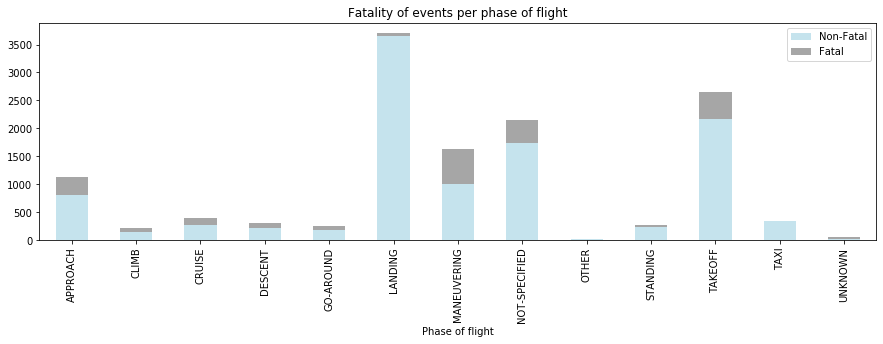

In [1196]:
print(data_for_eda.groupby(['broad_phase_of_flight','fatality']).broad_phase_of_flight.count().unstack())

parch = data_for_eda.groupby(['broad_phase_of_flight','fatality']).broad_phase_of_flight.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightblue','grey'], alpha = .70, figsize = (15,4))
p3.set_title('Fatality of events per phase of flight')
p3.set_xlabel('Phase of flight')
# p3.set_ylabel('count')
p3.legend(['Non-Fatal','Fatal'])
plt.show()

In [1197]:
def fatal_ratio(row):
    if row[0] !=0:
        ratio = row[1]/row[0]
    else: ratio = 0
    return ratio

In [1198]:
df_for_phase = (data_for_eda.groupby(['broad_phase_of_flight','fatality']).broad_phase_of_flight.count().unstack())
df_for_phase['fatal_ratio'] = df_for_phase.apply(lambda x: fatal_ratio(x), axis = 1)
df_for_phase.drop('UNKNOWN', axis = 0, inplace = True)

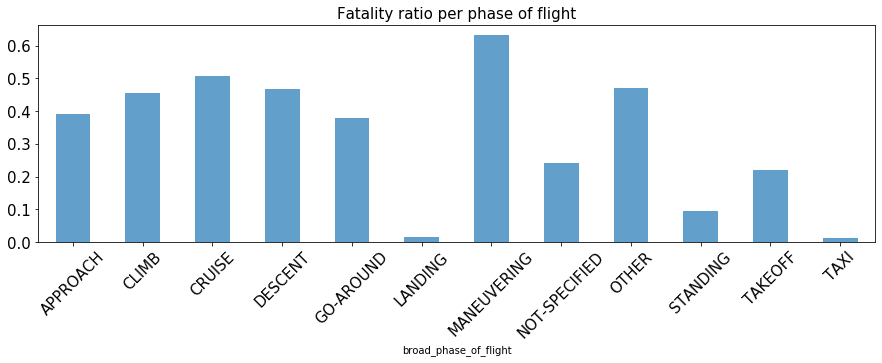

In [1199]:
plt.figure(figsize = (15,4))
p3 = df_for_phase.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio per phase of flight', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [1200]:
df_for_cat = (data_for_eda.groupby(['aircraft_category','fatality']).aircraft_category.count().unstack())
df_for_cat['fatal_ratio'] = df_for_cat.apply(lambda x: fatal_ratio(x), axis = 1)
df_for_cat.drop('Rocket', axis = 0, inplace = True)
df_for_cat.drop('Unknown', axis = 0, inplace = True)

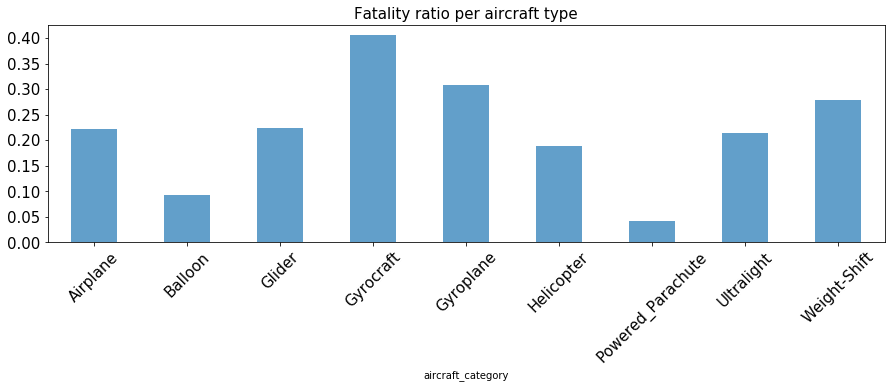

In [1201]:
plt.figure(figsize = (15,4))
p3 = df_for_cat.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
# p3.set_title('Fatality ratio')
# plt.xticks(rotation=45)
# p3.set_xlabel('Aircraft category')
p3.set_title('Fatality ratio per aircraft type', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

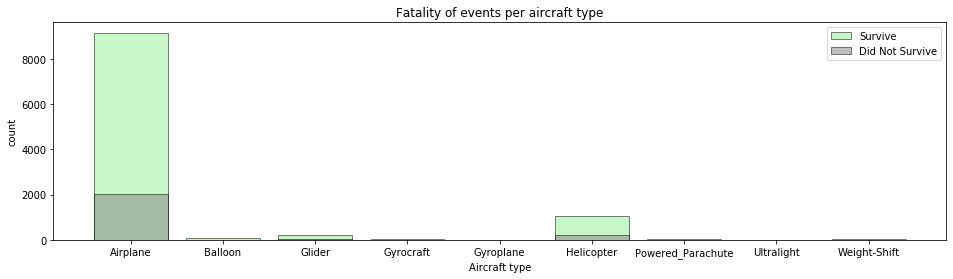

In [1202]:
fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(111)
ax1.bar(df_for_cat.index,height = df_for_cat[0], label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax1.bar(df_for_cat.index,height = df_for_cat[1], label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax1.set_title('Fatality of events per aircraft type')
ax1.set_xlabel('Aircraft type')
ax1.set_ylabel('count')
ax1.legend(loc = 'upper right')

fatality          0     1
amateur_built            
No             9409  1881
Yes            1363   458


<Figure size 1152x288 with 0 Axes>

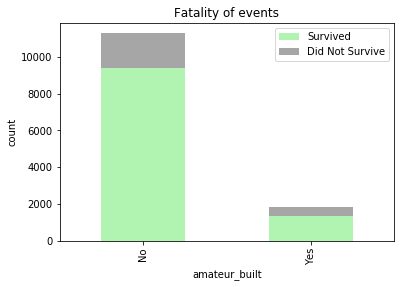

In [1203]:
print(data_for_eda.groupby(['amateur_built','fatality']).amateur_built.count().unstack())
fig = plt.figure(figsize = (16,4))
parch = data_for_eda.groupby(['amateur_built','fatality']).amateur_built.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightgreen','grey'], alpha = .70)
p3.set_title('Fatality of events')
p3.set_xlabel('amateur_built')
p3.set_ylabel('count')
p3.legend(['Survived','Did Not Survive'])
plt.show()

In [1204]:
df_for_amat = (data_for_eda.groupby(['amateur_built','fatality']).amateur_built.count().unstack())
df_for_amat['fatal_ratio'] = df_for_amat.apply(lambda x: fatal_ratio(x), axis = 1)

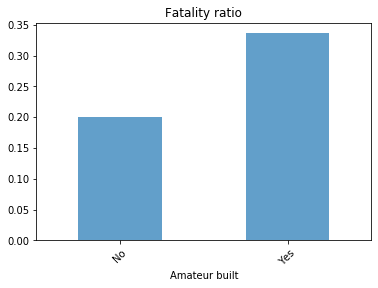

In [1205]:
plt.figure(figsize = (6,4))
p3 = df_for_amat.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio')
plt.xticks(rotation=45)
p3.set_xlabel('Amateur built')
plt.show()

fatality          0     1
engine_type              
None            194    25
Reciprocating  9059  1945
Turbo_Fan       262    23
Turbo_Jet        52    17
Turbo_Prop      509   160
Turbo_Shaft     485   122
Unknown         209    41
other             2     6


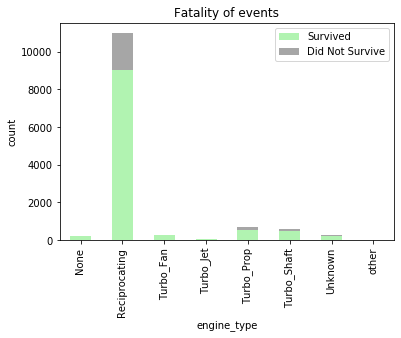

In [1206]:
print(data_for_eda.groupby(['engine_type','fatality']).engine_type.count().unstack())

parch = data_for_eda.groupby(['engine_type','fatality']).engine_type.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightgreen','grey'], alpha = .70)
p3.set_title('Fatality of events')
p3.set_xlabel('engine_type')
p3.set_ylabel('count')
p3.legend(['Survived','Did Not Survive'])
plt.show()

In [1209]:
df_for_eng = (data_for_eda.groupby(['engine_type','fatality']).engine_type.count().unstack())
df_for_eng['fatal_ratio'] = df_for_eng.apply(lambda x: fatal_ratio(x), axis = 1)
df_for_eng.drop('other', axis = 0, inplace=True)

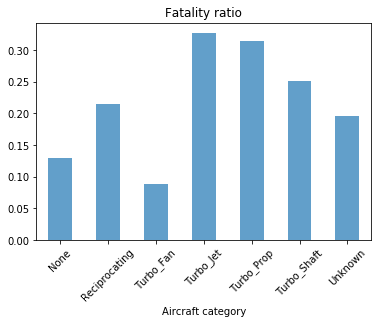

In [1210]:
plt.figure(figsize = (6,4))
p3 = df_for_eng.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio')
plt.xticks(rotation=45)
p3.set_xlabel('Aircraft category')
plt.show()

fatality     0    1
month              
1          532  136
2          571  130
3          817  161
4          881  168
5         1104  204
6         1269  249
7         1329  285
8         1298  281
9         1075  201
10         833  204
11         568  171
12         495  149


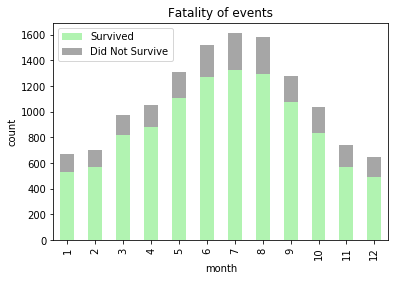

In [1211]:
print(data_for_eda.groupby(['month','fatality']).month.count().unstack())

parch = data_for_eda.groupby(['month','fatality']).month.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightgreen','grey'], alpha = .70)
p3.set_title('Fatality of events')
p3.set_xlabel('month')
p3.set_ylabel('count')
p3.legend(['Survived','Did Not Survive'])
plt.show()

In [1212]:
df_for_mon = (data_for_eda.groupby(['month','fatality']).month.count().unstack())
df_for_mon['fatal_ratio'] = df_for_mon.apply(lambda x: fatal_ratio(x), axis = 1)

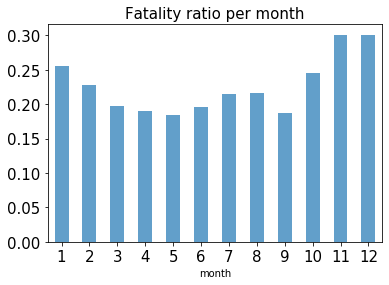

In [1213]:
plt.figure(figsize = (6,4))
p3 = df_for_mon.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio per month', fontsize = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.yticks(fontsize = 15)
# p3.set_xlabel('Month')
plt.show()

fatality     0    1
weekday            
0         1222  295
1         1300  230
2         1368  295
3         1361  296
4         1658  363
5         2147  458
6         1716  402


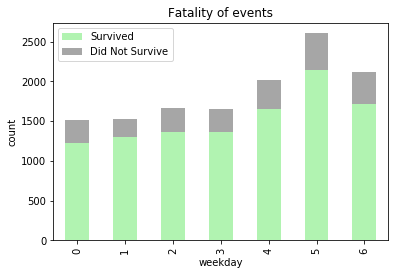

In [1214]:
print(data_for_eda.groupby(['weekday','fatality']).weekday.count().unstack())

parch = data_for_eda.groupby(['weekday','fatality']).weekday.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightgreen','grey'], alpha = .70)
p3.set_title('Fatality of events')
p3.set_xlabel('weekday')
p3.set_ylabel('count')
p3.legend(['Survived','Did Not Survive'])
plt.show()

In [1215]:
df_for_day = (data_for_eda.groupby(['weekday','fatality']).weekday.count().unstack())
df_for_day['fatal_ratio'] = df_for_day.apply(lambda x: fatal_ratio(x), axis = 1)

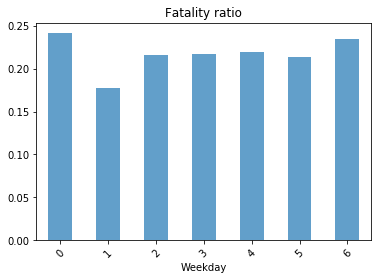

In [1216]:
plt.figure(figsize = (6,4))
p3 = df_for_day.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio')
plt.xticks(rotation=45)
p3.set_xlabel('Weekday')
plt.show()

fatality               0     1
weather_condition             
IMC                  254   366
UNK                   18    13
Unknown               47    13
VMC                10453  1947


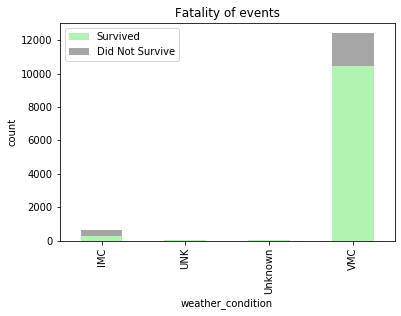

In [1217]:
print(data_for_eda.groupby(['weather_condition','fatality']).weather_condition.count().unstack())

parch = data_for_eda.groupby(['weather_condition','fatality']).weather_condition.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['lightgreen','grey'], alpha = .70)
p3.set_title('Fatality of events')
p3.set_xlabel('weather_condition')
p3.set_ylabel('count')
p3.legend(['Survived','Did Not Survive'])
plt.show()

In [1218]:
df_for_weather = (data_for_eda.groupby(['weather_condition','fatality']).weather_condition.count().unstack())
df_for_weather['fatal_ratio'] = df_for_weather.apply(lambda x: fatal_ratio(x), axis = 1)
df_for_weather.drop('UNK', axis = 0, inplace = True)
df_for_weather.drop('Unknown', axis = 0, inplace = True)

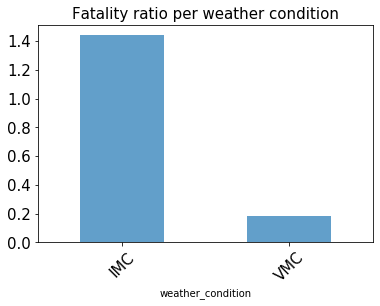

In [1219]:
plt.figure(figsize = (6,4))
p3 = df_for_weather.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio per weather condition', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [1220]:
df_for_damage = (data_for_eda.groupby(['aircraft_damage','fatality']).aircraft_damage.count().unstack())
df_for_damage['fatal_ratio'] = df_for_damage.apply(lambda x: fatal_ratio(x), axis = 1)
df_for_damage.drop('NOT-SPECIFIED', axis = 0, inplace = True)

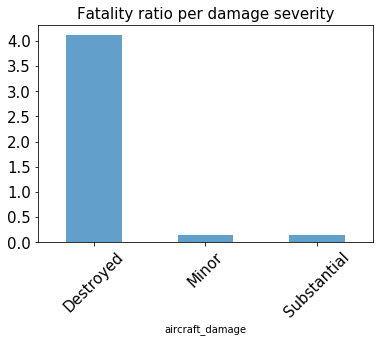

In [1221]:
plt.figure(figsize = (6,4))
p3 = df_for_damage.fatal_ratio.plot(kind = 'bar', stacked = True, alpha = .70)
p3.set_title('Fatality ratio per damage severity', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

broad_phase_of_flight  APPROACH  CLIMB  CRUISE  DESCENT  GO-AROUND  LANDING  \
aircraft_category                                                             
Airplane                  971.0  195.0   348.0    287.0      235.0   3381.0   
Balloon                    14.0    2.0     2.0      NaN        NaN     64.0   
Glider                     44.0    3.0     8.0      5.0        NaN     53.0   
Gyrocraft                   4.0    NaN     NaN      NaN        NaN      9.0   
Gyroplane                   1.0    1.0     NaN      NaN        NaN      2.0   
Helicopter                 80.0    9.0    41.0     11.0        4.0    177.0   
Powered_Parachute           4.0    1.0     1.0      NaN        1.0      3.0   
Rocket                      NaN    NaN     NaN      NaN        NaN      NaN   
Ultralight                  3.0    NaN     NaN      1.0        1.0      1.0   
Unknown                     NaN    NaN     NaN      NaN        NaN      NaN   
Weight-Shift                9.0    NaN     1.0      

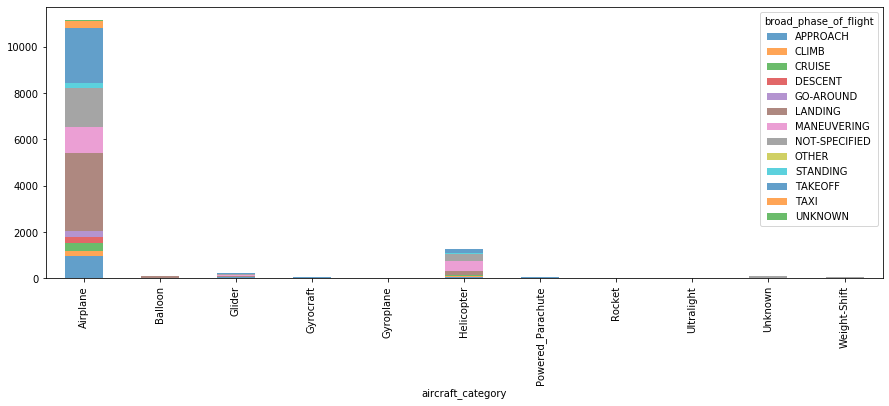

In [1222]:
print(data_for_eda.groupby(['aircraft_category','broad_phase_of_flight']).aircraft_category.count().unstack())
ax = data_for_eda.groupby(['aircraft_category','broad_phase_of_flight']).aircraft_category.count().unstack().plot(kind = 'bar', stacked = True,
                    alpha = .70, figsize = (15,5))
